# Needle in a Data Haystack - Introduction to Data Science (67978) 
### The Kendall Irrigation Project Using Data to Analyze Heterogeneity in Irrigation Patterns and 
### Plant Water Uptake

                               Isaac Kramer, Noam Gottlieb, Karin Osadon
                                  The Hebrew University of Jerusalem
                                              March 2019


## PRESENTATION OF FINDINGS
In this notebook we present the findings of our project

#### In order for all the widgets to work properly, you must run the all cells
#### In this notebook we used the following packages: plotly, cufflinks, ipywidgets, numpy, pandas, matplotlib, seaborn, IPython

In the next cell we install the necessary packages. This may take few minutes.

In [13]:
!pip install plotly
!pip install cufflinks
!pip install ipywidgets
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install IPython

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
%matplotlib inline


import plotly.plotly as py
from ipywidgets import interact

import plotly.graph_objs as go
import cufflinks as cf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot


#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)

import plotly
import ipywidgets as wg
from IPython.display import display, clear_output
from plotly.widgets import GraphWidget
from IPython.html.widgets import interact
plotly.offline.init_notebook_mode()
from plotly.offline import iplot




The following image shows the 10 areas

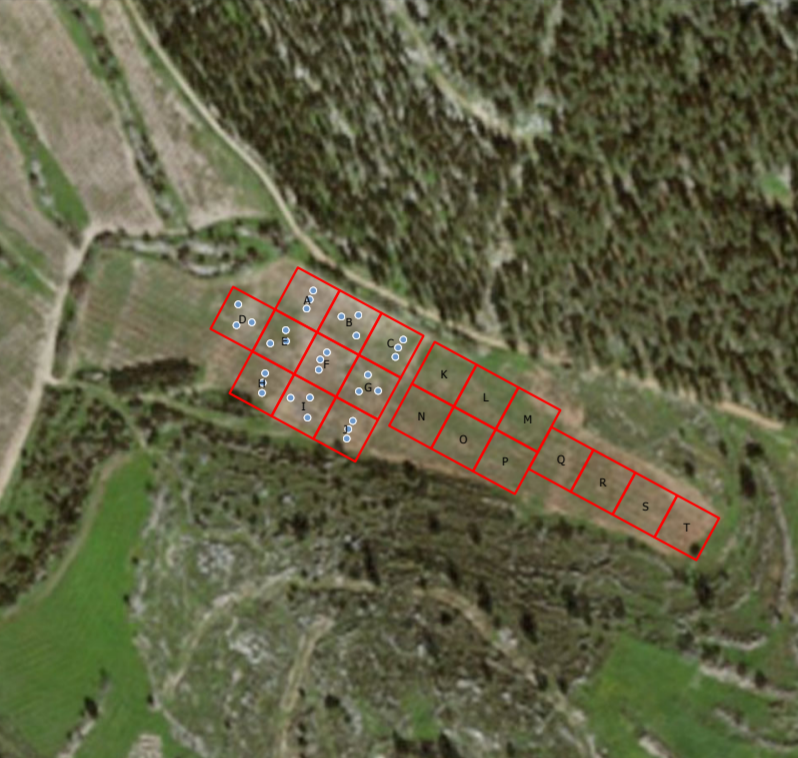

In [15]:
from IPython.display import Image
Image(filename="site_map.png", width=600, height=600)

## Data
Load our data

Readings from 30 Time-Domain Reectometry (TDR) sensors.

The TDR sensors were used to measure soil volumetric water content, soil temperature, and soil
electrical conductivity.

These data contain nan values. The reason is that some of the sensors probably did not work.

The measurements taken during the period from May to July 2018.


In [16]:
df = pd.read_csv("TDR_data_clean.txt", parse_dates={'date_time': [0]}, dayfirst = True)
df.columns = (df.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))

df


date_time  A_VWC_1  A_VWC_2  A_VWC_3  B_VWC_1  B_VWC_2  \
0     2018-05-01 00:05:00     20.4     24.8     22.7     26.2     24.8   
1     2018-05-01 00:10:00     20.0     24.7     22.6     25.2     25.2   
2     2018-05-01 00:15:00     19.6     25.2     23.4     25.9     25.1   
3     2018-05-01 00:20:00     21.5     24.3     21.6     25.4     25.1   
4     2018-05-01 00:25:00     20.4     24.2     21.2     25.9     25.1   
5     2018-05-01 00:30:00     20.1     24.7     22.0     25.8     25.1   
6     2018-05-01 00:35:00     20.0     24.4     21.7     26.3     25.0   
7     2018-05-01 00:40:00     19.4     24.1     20.9     26.2     24.9   
8     2018-05-01 00:45:00     20.4     24.7     22.2     25.5     25.1   
9     2018-05-01 00:50:00     20.3     23.3     22.5     26.3     24.3   
10    2018-05-01 00:55:00     20.3     24.6     22.6     25.3     24.6   
11    2018-05-01 01:00:00     20.4     24.9     22.4     25.6     24.3   
12    2018-05-01 01:05:00     20.2     24.3     22.0     26.0     24.6   
13    2018-05-01 01:10:00     20.3     23.9     22.5     25.5     23.9   
14    2018-05-01 01:15:00     19.9     24.5     21.1     26.5     24.8   
15    2018-05-01 01:20:00     19.8     23.8     21.5     25.8     24.1   
16    2018-05-01 01:25:00     20.9     24.1     22.3     26.5     25.0   
17    2018-05-01 01:30:00     20.2     24.0     21.7     25.5     25.1   
18    2018-05-01 01:35:00     20.2     23.7     22.6     26.1     24.9   
19    2018-05-01 01:40:00     21.0     24.1     21.6     26.6     24.7   
20    2018-05-01 01:45:00     21.4     24.6     21.3     27.2     24.6   
21    2018-05-01 01:50:00     19.4     24.1     21.2     25.8     25.1   
22    2018-05-01 01:55:00     20.4     24.0     21.5     25.9     24.7   
23    2018-05-01 02:00:00     20.0     24.5     21.7     25.5     24.9   
24    2018-05-01 02:05:00     20.7     24.8     21.5     25.7     23.8   
25    2018-05-01 02:10:00     20.2     24.1     21.2     25.7     24.9   
26    2018-05-01 02:15:00     20.0     24.6     21.4     26.3     25.4   
27    2018-05-01 02:20:00     20.6     24.7     23.0     25.7     24.9   
28    2018-05-01 02:25:00     19.9     25.2     22.1     28.3     24.8   
29    2018-05-01 02:30:00     19.9     24.2     21.3     26.1     25.2   
...                   ...      ...      ...      ...      ...      ...   
26466 2018-07-31 21:35:00     14.8     18.3     15.6      NaN      NaN   
26467 2018-07-31 21:40:00     14.8     18.3     15.6      NaN      NaN   
26468 2018-07-31 21:45:00     14.8     18.3     15.6      NaN      NaN   
26469 2018-07-31 21:50:00     14.9     18.1     15.8      NaN      NaN   
26470 2018-07-31 21:55:00     14.8     18.0     15.6      NaN      NaN   
26471 2018-07-31 22:00:00     14.8     18.3     15.6      NaN      NaN   
26472 2018-07-31 22:05:00     14.8     18.1     15.6      NaN      NaN   
26473 2018-07-31 22:10:00     14.8     17.8     15.7      NaN      NaN   
26474 2018-07-31 22:15:00     14.8     18.1     15.7      NaN      NaN   
26475 2018-07-31 22:20:00     14.8     18.1     15.6      NaN      NaN   
26476 2018-07-31 22:25:00     14.8     18.3     15.6      NaN      NaN   
26477 2018-07-31 22:30:00     14.8     18.3     15.6      NaN      NaN   
26478 2018-07-31 22:35:00     14.8     18.3     15.6      NaN      NaN   
26479 2018-07-31 22:40:00     14.8     18.3     15.5      NaN      NaN   
26480 2018-07-31 22:45:00     14.8     18.3     15.6      NaN      NaN   
26481 2018-07-31 22:50:00     14.8     18.4     15.8      NaN      NaN   
26482 2018-07-31 22:55:00     14.8     18.3     15.6      NaN      NaN   
26483 2018-07-31 23:00:00     14.8     18.4     15.7      NaN      NaN   
26484 2018-07-31 23:05:00     14.8     18.0     15.8      NaN      NaN   
26485 2018-07-31 23:10:00     14.8     18.4     15.5      NaN      NaN   
26486 2018-07-31 23:15:00     14.9     18.3     15.6      NaN      NaN   
26487 2018-07-31 23:20:00     14.8     18.0     15.6      NaN      NaN   
26488 2018-07-31 23:

## Explore the data


In [17]:

layout1 = go.Layout(title='Time vs Measurement', xaxis={'title':'Time'}, yaxis={'title':'Measurement'})



Choose the data you want to explore by select the area, measurement type and sensor's number

In [18]:
# this function called every time the widgets changes
def response1(Area, Measurement, Sensor):
    

    data = [go.Scatter(x= df['date_time'], y= df[Area + "_" 
      + Measurement + "_" + Sensor])]
    fig = go.Figure(data = data,layout= layout1 )

    iplot(fig)

interact(response1, Area=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
         Measurement = ['VWC', 'Soil_Temperature', 'Permitivity', 'BulkEC'],
        Sensor = ['1', '2', '3'])


                                                                        

interactive(children=(Dropdown(description='Area', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), value='A'), Dropdown(description='Measurement', options=('VWC', 'Soil_Temperature', 'Permitivity', 'BulkEC'), value='VWC'), Dropdown(description='Sensor', options=('1', '2', '3'), value='1'), Output()), _dom_classes=('widget-interact',))

<function __main__.response1>

## Clean the data

For the next measurements we need to "clean" the data from the nan values

In [19]:
# Import csv file with proper datetime format
df_no_nan = pd.read_csv("nan_reduced.csv", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_no_nan.columns = (df_no_nan.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))

df_no_nan

date_time  A_VWC_1  A_VWC_2  A_VWC_3  B_VWC_1  B_VWC_2  \
0     2018-05-03 00:00:00     21.8     25.3     23.0     26.2     25.6   
1     2018-05-03 00:05:00     21.7     25.2     22.8     26.3     25.8   
2     2018-05-03 00:10:00     21.7     25.2     22.7     26.3     25.7   
3     2018-05-03 00:15:00     21.8     25.3     22.8     26.3     25.8   
4     2018-05-03 00:20:00     21.9     25.2     22.7     26.2     25.7   
5     2018-05-03 00:25:00     21.8     25.2     22.7     26.3     25.7   
6     2018-05-03 00:30:00     21.8     25.2     22.8     26.2     25.8   
7     2018-05-03 00:35:00     21.7     25.3     22.8     26.1     25.8   
8     2018-05-03 00:40:00     21.6     25.3     22.6     26.2     25.7   
9     2018-05-03 00:45:00     21.8     25.3     22.9     26.2     25.7   
10    2018-05-03 00:50:00     21.8     25.3     22.9     26.2     25.7   
11    2018-05-03 00:55:00     21.6     25.2     22.8     26.2     25.7   
12    2018-05-03 01:00:00     21.6     25.2     22.8     26.2     25.8   
13    2018-05-03 01:05:00     21.9     25.1     22.9     26.3     25.7   
14    2018-05-03 01:10:00     21.8     25.3     22.7     26.2     25.8   
15    2018-05-03 01:15:00     21.7     25.2     22.7     26.3     25.7   
16    2018-05-03 01:20:00     21.8     25.1     22.8     26.3     25.8   
17    2018-05-03 01:25:00     21.7     25.2     22.8     26.2     25.7   
18    2018-05-03 01:30:00     21.7     25.3     22.9     26.3     25.7   
19    2018-05-03 01:35:00     21.8     25.4     22.7     26.2     25.7   
20    2018-05-03 01:40:00     21.7     25.2     22.8     26.2     25.6   
21    2018-05-03 01:45:00     21.8     25.4     22.6     26.2     25.8   
22    2018-05-03 01:50:00     21.7     25.2     22.8     26.3     25.8   
23    2018-05-03 01:55:00     21.8     25.3     22.9     26.1     25.7   
24    2018-05-03 02:00:00     21.7     25.2     22.7     26.2     25.7   
25    2018-05-03 02:05:00     21.7     25.2     22.7     26.2     25.7   
26    2018-05-03 02:10:00     21.6     25.3     22.7     26.2     25.8   
27    2018-05-03 02:15:00     21.8     25.2     22.8     26.2     25.7   
28    2018-05-03 02:20:00     21.7     25.2     23.0     26.1     25.7   
29    2018-05-03 02:25:00     21.6     25.2     22.9     26.2     25.7   
...                   ...      ...      ...      ...      ...      ...   
23983 2018-07-25 06:35:00     15.0     18.4     15.9     19.2     16.6   
23984 2018-07-25 06:40:00     15.0     18.4     15.9     19.2     16.7   
23985 2018-07-25 06:45:00     15.0     18.6     16.2     19.2     16.6   
23986 2018-07-25 06:50:00     15.0     18.3     15.9     19.3     16.7   
23987 2018-07-25 06:55:00     15.0     18.4     15.8     19.2     16.7   
23988 2018-07-25 07:00:00     14.9     18.3     16.1     19.3     16.7   
23989 2018-07-25 07:05:00     15.0     18.2     15.8     19.3     16.8   
23990 2018-07-25 07:10:00     15.0     18.2     16.0     19.3     16.7   
23991 2018-07-25 07:15:00     14.9     18.2     16.1     19.2     16.7   
23992 2018-07-25 07:20:00     14.9     18.1     16.1     19.2     16.7   
23993 2018-07-25 07:25:00     14.9     18.4     15.9     19.4     16.8   
23994 2018-07-25 07:30:00     15.0     18.4     15.8     19.4     16.7   
23995 2018-07-25 07:35:00     14.9     18.4     16.0     19.3     16.7   
23996 2018-07-25 07:40:00     15.0     18.5     16.1     19.4     16.7   
23997 2018-07-25 07:45:00     15.0     18.3     15.9     19.4     16.7   
23998 2018-07-25 07:50:00     15.0     18.5     15.9     19.3     16.7   
23999 2018-07-25 07:55:00     15.0     18.5     15.9     19.3     16.7   
24000 2018-07-25 08:00:00     15.0     18.3     16.1     19.3     16.7   
24001 2018-07-25 08:05:00     14.9     18.6     15.9     19.3     16.8   
24002 2018-07-25 08:10:00     14.9     18.4     16.1     19.2     16.6   
24003 2018-07-25 08:15:00     14.8     18.4     16.0     19.4     16.7   
24004 2018-07-25 08:20:00     15.0     18.5     16.0     19.4     16.7   
24005 2018-07-25 08:

## Time vs VWC


Load the Volumetric Water Content data

In [20]:


import plotly.graph_objs as go
import cufflinks as cf


# Import csv file with proper datetime format
df_vwc = pd.read_csv("TDR_data_clean_VWC.csv", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_vwc.columns = (df_vwc.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))


In [21]:




layout2 = go.Layout(title='Time vs Volumetric Water Content', xaxis={'title':'Time'}, yaxis={'title':'VWC'})

vwc_data = [go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_1"], name='Sensor_1'),
                          go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_2"], name='Sensor_2'),
                       go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_3"], name='Sensor_3')]


fig_vwc = go.Figure(data = vwc_data, layout= layout2)




This function is called whenever the selection is changed. The graph is displayed according to user selection

In [22]:


def response2(Area):
    
    vwc_data = [go.Scatter(x= df_vwc['date_time'], y= df_vwc[Area + "_VWC_1"], name='Sensor_1'),
                          go.Scatter(x= df_vwc['date_time'], y= df_vwc[Area + "_VWC_2"], name='Sensor_2'),
                       go.Scatter(x= df_vwc['date_time'], y= df_vwc[Area + "_VWC_3"], name='Sensor_3')]
    vwc_data[0].y = df_vwc[Area + "_VWC_1"].values
    vwc_data[1].y = df_vwc[Area + "_VWC_2"].values
    vwc_data[2].y = df_vwc[Area + "_VWC_3"].values
   
    fig_vwc = go.Figure(data = vwc_data, layout= layout2 )
    iplot(fig_vwc,filename='time vs irrigation2')
interact(response2, Area=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

   

interactive(children=(Dropdown(description='Area', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), value='A'), Output()), _dom_classes=('widget-interact',))

<function __main__.response2>

Select the area you want to explore

## Time vs Irriugation

Load the irrigation data

In [23]:
import time
import datetime

irrigation_df = pd.read_csv("Irrigation.csv", parse_dates={'date_time': [0]}, dayfirst = True)

irrigation_df['date'] = pd.to_datetime(irrigation_df['date_time'])

In [24]:


t1 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['A'],
    name='Irrigation area A'
)

t2 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['B'],
    name='Irrigation area B'
)

t3 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['C'],
    name='Irrigation area C'
)

t4 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['D'],
    name='Irrigation area D'
)

t5 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['E'],
    name='Irrigation area E'
)

t6 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['F'],
    name='Irrigation area F'
)

t7 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['G'],
    name='Irrigation area G'
)

t8 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['H'],
    name='Irrigation area H'
)

t9 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['I'],
    name='Irrigation area I'
)

t10 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['J'],
    name='Irrigation area J'
)

data = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

layout = go.Layout( title='Time vs Irrigation',
    xaxis=dict(
        title='Time',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Irrigation',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))




fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='time vs irrigation')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

## Time vs SWP

Load the Stem Water Potential data

In [ ]:
# Import csv file with proper datetime format
df_swp = pd.read_csv("SWP_by_Sensor.csv", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_swp.columns = (df_swp.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))

df_swp

## Scatter plot showing the Stem Water Potential against Volumetric Water Content (SWP_scatter.py)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import csv files with proper datetime format
soil_df = pd.read_csv("Good_Sensors_Only_VWC.csv", parse_dates={'date_time': [0]}, dayfirst = True)
stem_df = pd.read_csv("SWP_by_Sensor.csv", parse_dates={'date_time': [0]}, dayfirst = True) 


# Edit column header names to enable splitting later on
soil_df.columns = (soil_df.columns.str.replace(' ', '_').str.replace('(', '')
                   .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
                   .str.replace('Interface', '').str.replace('Sensor_', ''))

# Resample for daily average
soil_df = soil_df.set_index('date_time')
soil_df = soil_df.resample('D').mean()
soil_df['date_time'] = soil_df.index


# Select dates that SWP measurement was done on
myDates = ['2018-05-23', '2018-05-30', '2018-06-06', '2018-06-13',
           '2018-06-20', '2018-06-27', '2018-07-04', '2018-07-11',
           '2018-07-18', '2018-07-25', '2018-07-31']
soil_df = soil_df[soil_df.index.isin(myDates)]

# Melt dataframe to long format. Easier for plotting.
soil_df = pd.melt(soil_df, id_vars = 'date_time', value_name = "SWC")
stem_df = pd.melt(stem_df, id_vars = 'date_time', value_name = "SWP")

# Merge
soil_df['SWP'] = stem_df['SWP']

# Separate 'variable' column into components
soil_df['Area'], soil_df['Variable'], soil_df['Sensor'] = soil_df['variable'].str.split('_').str

# Plot all the data together

layout3 = go.Layout(title='Scatter plot showing the SWP against VWC', xaxis={'title':'Soil Water Content (%)'},
                    yaxis={'title':'Stem Water Potential (MPa)'})

data2 = [go.Scatter(mode = 'markers', x= soil_df.SWC.values, y= soil_df.SWP.values)]

fig = dict(data=data2, layout=layout3)
iplot(fig, filename='styled-scatter')




Our code above compares the SWC to the SWP, restricting analysis to the
days in which the SWP was measured. Plotting all the values for SWP against SWC, as
shown in the above figure we see little visible correlation.

In [ ]:
# Create facet plot using seaborn
sns.set_style("whitegrid")
plt.figure()
g = sns.lmplot(x="SWC", y="SWP", col="Area", hue="Sensor",
               data=soil_df, col_wrap=3, ci=None)
g.set_axis_labels("Soil Water Content (%)", "Stem Water Potential (MPa)").set(xlim=(10, 26), ylim=(-1.5, 0.0)).fig.subplots_adjust(wspace=.02)
g.add_legend() 



## Effect of Slope and Soil Depth on Water Loss Rate

This code identifies the local maxima in water
content (i.e., the water content following an irrigation event), as shown in the figure below. It
then calculates the rate of decline following these events.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm
from scipy.signal import argrelextrema



# Import csv files with proper datetime format
soil_df = pd.read_csv("Good_Sensors_Only_VWC.csv", parse_dates={'date_time': [0]}, dayfirst = True)
sensor_df = pd.read_csv("sensor_meta.csv")

# Edit column header names to enable splitting later on
soil_df.columns = (soil_df.columns.str.replace(' ', '_').str.replace('(', '')
                   .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
                   .str.replace('Interface', '').str.replace('Sensor_', ''))

# Resample for daily average
soil_df = soil_df.set_index('date_time')
soil_df = soil_df.resample('1H').mean()

# Get column names
columns = list(soil_df)

# Output data frame
deriv_df = pd.DataFrame(columns=columns, index=np.arange(1))

# Loop over column headers
for sensor in columns:
    # New data frame with only data from that sensor
    df = soil_df.filter([sensor], axis=1)
    
    # Find local maxima
    #df['max'] = df[(df.shift(1) < df) & (df.shift(-1) < df)]
    n=60 # number of points to be checked before and after 
    df['max'] = df.iloc[argrelextrema(df.values, np.greater_equal, order=n)[0]][sensor]
    date_time_low = '2018-05-10 00:00:00'
    date_time_high = '2018-07-11 00:00:00'
    date_time_low = datetime.datetime.strptime(date_time_low, '%Y-%m-%d %H:%M:%S')
    date_time_high = datetime.datetime.strptime(date_time_high, '%Y-%m-%d %H:%M:%S')
    df.loc[df.index < date_time_low, 'max'] = np.nan
    df.loc[df.index > date_time_high, 'max'] = np.nan

    # Initiate column for loss rates
    df['loss_rate'] = np.NaN
    
    # Add column for gradients
    gradient = pd.Series(np.gradient(df[sensor]), df.index, name='gradient')
    df['gradient'] = gradient
    
    
    # Create list with index values when there is a local maximum
    max_index = df.index[df['max'] > 0].tolist()
    
  
    
    layout4 = go.Layout(title=sensor, xaxis={'title':'Time'}, yaxis={'title':'VWC'})

    max_vwc_data = [go.Scatter(x= df.index, y= df[sensor], name="vwc"), go.Scatter(mode = 'markers', x= df.index, y= df['max']
                                                                                   , name="max_vwc")]


    fig_max_vwc = go.Figure(data = max_vwc_data, layout= layout4)
    iplot(fig_max_vwc, filename='max_vwc')

    # Find rate of loss based on two days after irrigation and store in list
    df['rolling_gradient'] = df['gradient'].rolling(72).mean().shift(-72).dropna()
    df = df[df['max']>0]
    loss_rate = df['rolling_gradient'].mean()
    
    # Store average in dataframe
    deriv_df.at[0, sensor] = loss_rate
    

    
# Transpose dataframe
deriv_df = deriv_df.T
deriv_df.columns = ['loss_rate']
deriv_df["loss_rate"] = pd.to_numeric(deriv_df.loss_rate, errors='coerce')

# Add slopes and soil depth to dataframe
ind = np.arange(len(deriv_df)) 
deriv_df['ind'] = ind
deriv_df = deriv_df.set_index('ind')
deriv_df['slope'] = sensor_df['slope']
deriv_df['soil_depth'] = sensor_df['soil_depth']
deriv_df['aspect'] = sensor_df['aspect']

#plt.scatter(deriv_df.slope, deriv_df.loss_rate, c='r')    
    

# Linear model        
        
X = deriv_df[["slope", "soil_depth"]]
y = deriv_df["loss_rate"]
#X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model




In [ ]:

layout5 = go.Layout(xaxis={'title':'Slope'}, yaxis={'title':'Loss Rate'})
slope_data = [go.Scatter(mode = 'markers', x= deriv_df.slope, y= deriv_df.loss_rate)]
fig_slope = go.Figure(data = slope_data, layout= layout5)

layout6 = go.Layout(xaxis={'title':'Soil Depth (cm)'}, yaxis={'title':'Loss Rate'})
soil_data = [go.Scatter(mode = 'markers', x= deriv_df.soil_depth, y= deriv_df.loss_rate,  marker = dict(

        color = 'red'))]
fig_soil = go.Figure(data = soil_data, layout= layout6)

iplot(fig_slope, filename='fig_slope')
iplot(fig_soil, filename='fig_soil')



Unfortunately, our results showed little connection between the "average loss rate" and
the soil slope and/or soil depth. The figures above includes plots showing the average loss rate
following an irrigation event vs. slope and soil depth (cm). As is clear in these plots, no
visible relationship exists between the variables.

## DTW distances matrix

In [ ]:
Image(filename="dtw_distances_matrix.png", width=600, height=600)

## Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

df2 = pd.read_pickle('dtw_distances_H_sampling.pkl')
condensed_distance_matrix = squareform(df2.values)
Z = linkage(condensed_distance_matrix, metric='precomputed')
dendrogram(Z, orientation='right', labels=df2.columns.tolist())

plt.show()
